In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The Cost of a Coin Toss

In the second article of the Quant Simplified series, a quiz was posted at the end, as follows:

Consider our coin-tossing game again. If the rule of the game is that after tossing the coins for 50 turns if your cumulative score is greater than 6 (i.e. you have tossed 6 more heads than you did tails), I will pay you $5 + a dollar for every point exceeding 6. Ignoring the efforts needed to toss the coin (50 times can be very tiring I know), what is the minimum amount that you should pay to play the game?

Recall: At every toss, if you get a ‘head’, you assign a score of ‘1’ to your score sheet. Otherwise, if you get a ‘tail’, you assign a score of ‘-1’ instead.

---

Approach:<br>
Step 1: Determine the pay out of each possible outcome<br>
Step 2: Work out the probability of each possible outcome of the game<br>
Step 3: Derive the cost of playing the coin tossing game - the probability-weighted sum of pay out per outcome

## Step 1: Determine the pay out

In [2]:
# Determine the pay out of each possible outcome
x = np.arange(0, 50, 1) # number of heads in 50 tosses
y = np.array([5*(i >= 28) + (i - 28)*(i >= 28) for i in x]) # pay out per possible outcome

## Step 2: Work out the probability of each possible outcome of the game

Given that the coin is fair, the probability of getting a head or a tail is the same, i.e.

$$\mathbb{P}(\omega = H) = \mathbb{P}(\omega = T) = 0.5$$

Therefore, the probability of tossing all Heads or all Tails for 50 consecutive times would be simply compounding this probability by 50 times, i.e.

$$\mathbb{P}\big(x = 50\big) = \mathbb{P}\big(x = -50\big) = 0.5^{50}$$

How about the other possible outcomes? Here, we'd need to use 'Combination'. Given number of turns $N = 50$, we want to find the number of combinations of each number of Heads $r$ is tossed. Mathematically, number of possible combination where there $r$ number of Heads are attained during $N=50$ number of turns is

$$
^nC_r = \frac{n!}{r!(n-r)!}
$$

So, the probability of outcome $r$ can be expressed analytically as follows:

$$\mathbb{P}(x = r) = \frac{n!}{r!(n-r)!} \times 0.5^{50}$$

In [3]:
combo = np.array([np.math.factorial(50)/(np.math.factorial(r)*np.math.factorial(50-r)) for r in x])
prob = combo * (0.5**50)

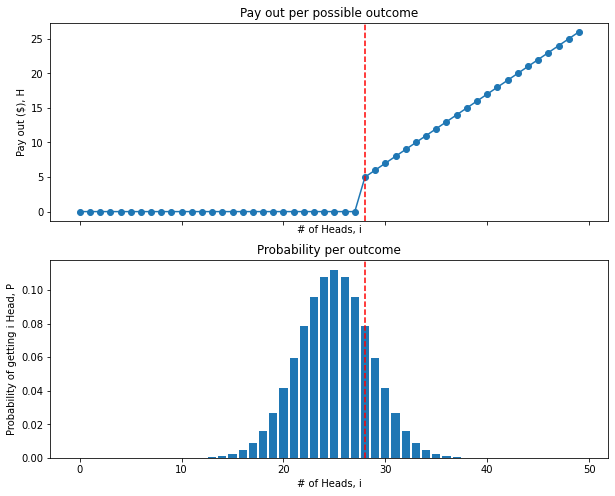

In [4]:
fig, axs = plt.subplots(2, figsize = (10,8), sharex = True)
axs[0].plot(x, y, marker = 'o')
axs[0].axvline(28, c = 'r', ls = '--')
axs[0].set_xlabel('# of Heads, i')
axs[0].set_ylabel('Pay out ($), H')
axs[0].set_title('Pay out per possible outcome')

axs[1].bar(x, prob)
axs[1].axvline(28, c = 'r', ls = '--')
axs[1].set_xlabel('# of Heads, i')
axs[1].set_ylabel('Probability of getting i Head, P')
axs[1].set_title('Probability per outcome')

plt.show()

## Step 3: Derive the cost of playing the coin tossing game

The cost of playing the game should then be:
$$V = \sum_{i=0}^{50} \big( \mathbb{P}(x_i = i) \times H_i \big)$$

In [5]:
V = np.dot(prob, y)

print('The cost of playing the coin tossing game is ${:.2f}.'.format(V))

The cost of playing the coin tossing game is $1.58.


---
© 2023 Finsinyur. All rights reserved.